In [88]:
# Downloading images
!wget https://www.inf.ufrgs.br/~oliveira/Cursos/INF01046/radialchirp.png
!wget https://www.inf.ufrgs.br/~oliveira/Cursos/INF01046/Parrots_kodim23.png
!wget https://people.math.sc.edu/Burkardt/data/tif/cameraman.tif

--2021-04-27 23:54:48--  https://www.inf.ufrgs.br/~oliveira/Cursos/INF01046/radialchirp.png
Resolving www.inf.ufrgs.br (www.inf.ufrgs.br)... 143.54.11.34
Connecting to www.inf.ufrgs.br (www.inf.ufrgs.br)|143.54.11.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49499 (48K) [image/png]
Saving to: ‘radialchirp.png.2’

radialchirp.png.2   100%[===================>]  48.34K  --.-KB/s    in 0.1s    

2021-04-27 23:54:49 (361 KB/s) - ‘radialchirp.png.2’ saved [49499/49499]

--2021-04-27 23:54:49--  https://www.inf.ufrgs.br/~oliveira/Cursos/INF01046/Parrots_kodim23.png
Resolving www.inf.ufrgs.br (www.inf.ufrgs.br)... 143.54.11.34
Connecting to www.inf.ufrgs.br (www.inf.ufrgs.br)|143.54.11.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 557596 (545K) [image/png]
Saving to: ‘Parrots_kodim23.png.2’

Parrots_kodim23.png 100%[===================>] 544.53K  1007KB/s    in 0.5s    

2021-04-27 23:54:50 (1007 KB/s) - ‘Parrots_kodim23.png.2’ sa

In [89]:
import imageio
import numpy as np
import scipy as sp
import math
import cmath
import matplotlib.pyplot as plt

# Parte 1A

In [90]:
def f(u, N, t):
  return math.cos(u * (2 * math.pi/N) * t)

def g(u, N, t):
  return math.cos((N - u) * (2 * math.pi/N) * t)

In [91]:
N = 200
t = [x for x in range(N)]
range_u = range(1,6,2)
len_u = len(range_u)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


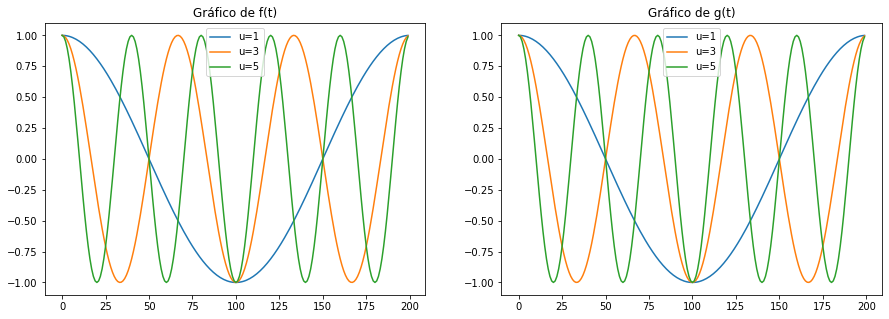

In [92]:
figure = plt.figure(figsize=(15,5))

for u in range_u:
  y = []
  for x in t:
    y.append(f(u, N, x))

  figure.add_subplot(1, 2, 1)
  plt.plot(t,y,label=f"u={u}")
  plt.legend()
  plt.title('Gráfico de f(t)')

for u in range_u:
  y = []
  for x in t:
    y.append(g(u, N, x))

  figure.add_subplot(1, 2, 2)
  plt.plot(t,y,label=f"u={u}")
  plt.legend()
  plt.title('Gráfico de g(t)')

1.<br>
a) Observa-se que os gráficos de ambas funções são iguais (frequencia u = frequencia N-u).<br>
b) O sinal perde resolução pois a frequência aumenta enquanto o sampling fica igual.<br>
c) Aumenta a resolução do sinal.<br>
d) Começam a aparecer efeitos de aliasing.<br>
e) Tecnicamente ainda não passou do limite de nyquist, então o sinal ainda pode ser recuperado.<br>
f) A partir de 100, pois para N = 200 o limite de nyquist seria N/2 = 100.<br>
g) Essas observações demonstram o teorema da amostragem, pois quando a frequência é muito alta e/ou a amostragem muito baixa, têm-se aliasing, impossibilitando a reconstrução correta do sinal, e quado a amostragem é muito alta comparado a frequência gastam-se recursos com uma resolução desnecessariamente alta.<br>

In [93]:
def f_2D(u, v, N, M, x, y):
  return math.cos(2 * math.pi * (u * x/N + v * y/M))

def g_2D(u, v, N, M, x, y):
  return math.cos(2 * math.pi * ((N - u) * x/N + (M - v) * y/M))

def map(n):
  n = 128*n+128
  if n == 256:
    n = 255
  return np.uint8(n)

In [94]:
# para testes, mudar N e M aqui.
N = 200
M = 200
range_u = range(1,6,2)
range_v = range(1,6,2)
x = [x for x in range(N)]
y = [x for x in range(M)]

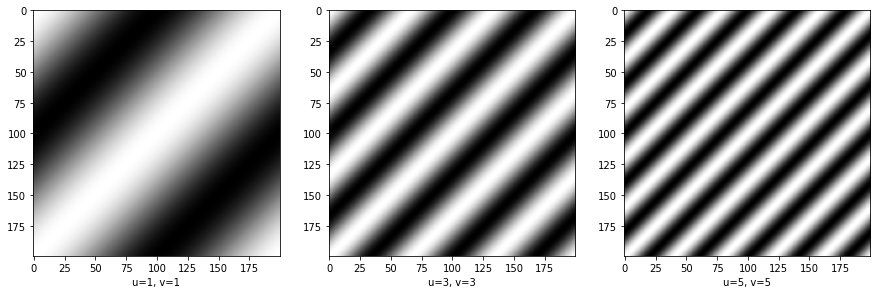

In [95]:
figure = plt.figure(figsize=(len_u*5,len_u*5))
for i in range(len_u):
  u = range_u[i]
  v = range_v[i]
  im = []
  imgplot = figure.add_subplot(1, len_u, i+1)
  for yn in y:
    row = []
    for xn in x:
      row.append(map(f_2D(u, v, N, M, xn, yn)))
    
    im.append(row)

  plt.imshow(im, cmap="gray")
  imgplot.set_xlabel(f"u={u}, v={v}")

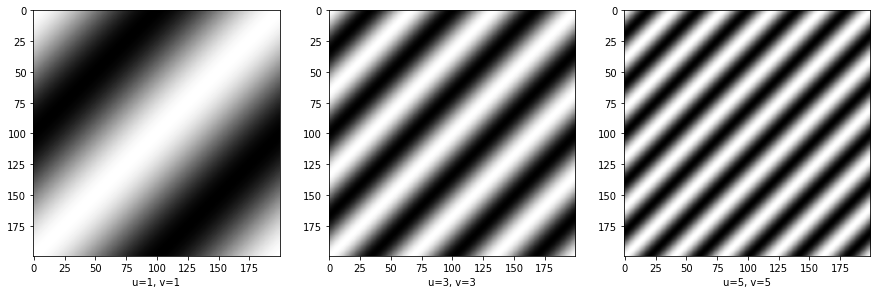

In [96]:
figure = plt.figure(figsize=(len_u*5,len_u*5))
for i in range(len_u):
  u = range_u[i]
  v = range_v[i]
  im = []
  imgplot = figure.add_subplot(1, len_u, i+1)
  for yn in y:
    row = []
    for xn in x:
      row.append(map(g_2D(u, v, N, M, xn, yn)))
    
    im.append(row)

  plt.imshow(im, cmap="gray")
  imgplot.set_xlabel(f"u={u}, v={v}")

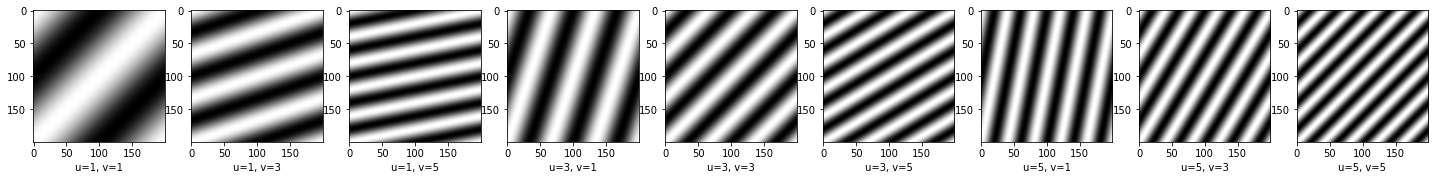

In [97]:
figure = plt.figure(figsize=(25,25))
k= 1
for i in range(len_u):
  for j in range(len_u):
    im = []
    u = range_u[i]
    v = range_v[j]
    imgplot = figure.add_subplot(1, len_u * len_u, k)
    k = k + 1
    for yn in y:
      row = []
      for xn in x:
        row.append(map(g_2D(u, v, N, M, xn, yn)))
  
      im.append(row)
    
    
    plt.imshow(im, cmap="gray")
    imgplot.set_xlabel(f"u={u}, v={v}")



2.<br>
a) Como o intervalo de -1 a 1 foi mapeado para uma escala de cores 0 a 255, podemos interpretar as imagens como ondas (frequência).<br>
b) Sim, para valores de u diferentes de v percebemos diferentes inclinações nas listas: maior u faz as listas se inclinarem mais verticalmente (mais ciclos no eixo X), maior v faz as listras se inclinarem mais horizontalmente (mais ciclos no eixo Y). Já para valores de N e M diferentes entre si apenas percebemos diferença no shape da imagem.<br>
c) Com menor número de amostras (N = 50 e M = 50, por exemplo), podemos ver a imagem bem pixelada, no entanto com amostras muito grandes (N = 500 e M = 500, por exemplo), as listras ficam com zoom in e apresentam borramento.

# Parte 1B

In [98]:
img_cman = imageio.imread("cameraman.tif")
img_chirp = imageio.imread("radialchirp.png")

In [99]:
def reducing_subsamp(image, Sx, Sy):
  width  = image.shape[1]
  height = image.shape[0]

  new_image = []

  # move o retangulo sobre a imagem
  for y in range(0, height, Sy):
    pixel_row = []
    for x in range(0, width, Sx):
      # encontra os limites do retangulo
      x_sup = x
      x_inf = width if x+Sx > width else x+Sx
      y_sup = y
      y_inf = height if y+Sy > height else y+Sy

      # dentro de cada retangulo
      img_slice = image[y_sup:y_inf, x_sup:x_inf]
      pixel_row.append(img_slice[0][0])
    
    new_image.append(pixel_row)
  
  return new_image

# (a)
Os resultados obtidos após a redução por sub-amostragem permanecem semelhantes a imagem original, ainda que com efeito pixelado como consequência da redução.

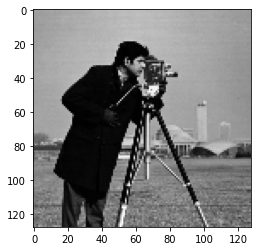

In [100]:
plt.imshow(reducing_subsamp(img_cman, 2, 2), cmap="gray")

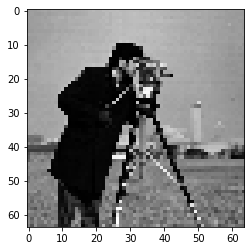

In [101]:
plt.imshow(reducing_subsamp(img_cman, 4, 4), cmap="gray")

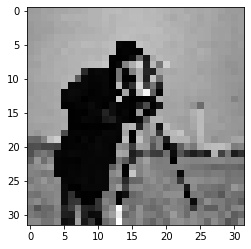

In [102]:
plt.imshow(reducing_subsamp(img_cman, 8, 8), cmap="gray")

# (b)
As imagens obtidas não são semelhantes a imagem original por que a imagem original é periódica, logo, conforme vamos fazendo a redução por subamostragens, vão surgindo artefatos em função da periodicidade.

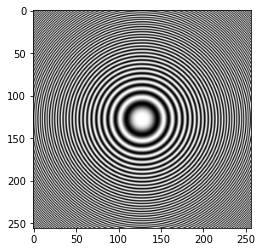

In [103]:
plt.imshow(img_chirp, cmap="gray")

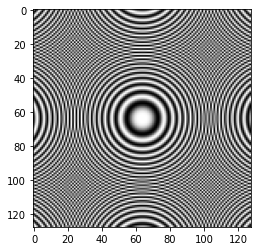

In [104]:
plt.imshow(reducing_subsamp(img_chirp, 2, 2), cmap="gray")

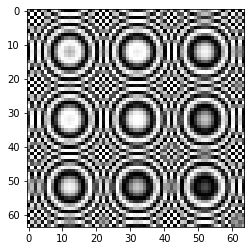

In [105]:
plt.imshow(reducing_subsamp(img_chirp, 4, 4), cmap="gray")

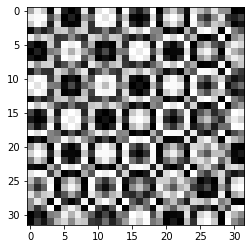

In [106]:
plt.imshow(reducing_subsamp(img_chirp, 8, 8), cmap="gray")

# Parte 2

### 4. Upscaling

### (a)

In [107]:
def upscaling(image, scale_factor_h, scale_factor_v):

  img_dftshift = np.fft.fftshift(np.fft.fft2(image))

  # pega o tamanho da borda. Por exemplo, scale factor = 1.25, logo 0.25 X tamanho imagem.
  diff_y = int((scale_factor_h - 1) * img_dftshift.shape[0])
  diff_x = int((scale_factor_v - 1) * img_dftshift.shape[1])

  new_x = img_dftshift.shape[1] + diff_x
  new_y = img_dftshift.shape[0] + diff_y
  new_img = np.zeros((new_y , new_x), dtype=np.complex128)

  for y in range(img_dftshift.shape[0]):
    for x in range(img_dftshift.shape[1]):
      new_img[int(y + diff_y/2)][int(x + diff_x/2)] = img_dftshift[y][x]
  
  new_img = np.fft.fftshift(new_img) * scale_factor_h * scale_factor_v
  new_img = np.fft.ifft2(new_img)

  return np.uint8(np.clip(new_img.real, 0, 255))

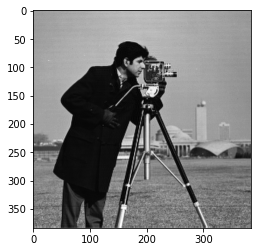

In [108]:
plt.imshow(upscaling(img_cman, 1.50, 1.50), cmap="gray")

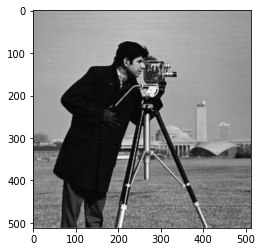

In [109]:
plt.imshow(upscaling(img_cman, 2.00, 2.00), cmap="gray")

### (b)

In [110]:
img_parrot = imageio.imread("Parrots_kodim23.png")

def coloredUpscaling(image, scale_factor_h, scale_factor_v):
  red_part = image[:,:,0]
  green_part = image[:,:,1]
  blue_part = image[:,:,2]

  red_part = upscaling(red_part, scale_factor_h, scale_factor_v)
  green_part = upscaling(green_part, scale_factor_h, scale_factor_v)
  blue_part = upscaling(blue_part, scale_factor_h, scale_factor_v)

  new_img = np.dstack((red_part, green_part, blue_part))
  return np.uint8(np.clip(new_img.real, 0, 255))

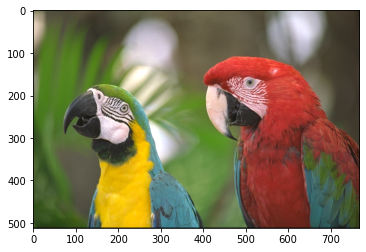

In [111]:
plt.imshow(img_parrot)

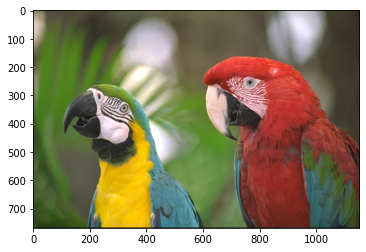

In [112]:
plt.imshow(coloredUpscaling(img_parrot, 1.50, 1.50))

### 5. Downscaling

### (a)

In [113]:
def downscaling(image, scale_factor_h, scale_factor_v):
  img_dftshift = np.fft.fftshift(np.fft.fft2(image))

  h = img_dftshift.shape[0]
  w = img_dftshift.shape[1]

  diff_y = int(((1 - scale_factor_h) * h)/2)
  diff_x = int(((1 - scale_factor_v) * w)/2)

  new_img = img_dftshift[diff_y:h-diff_y,diff_x:w-diff_x]
  new_img = np.fft.fftshift(new_img) * scale_factor_h * scale_factor_v
  new_img = np.fft.ifft2(new_img)

  return np.uint8(np.clip(new_img.real, 0, 255))

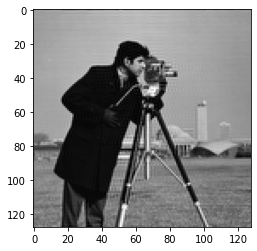

In [114]:
plt.imshow(downscaling(img_cman, 0.5, 0.5), cmap="gray")

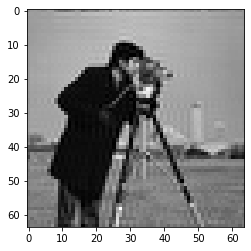

In [115]:
plt.imshow(downscaling(img_cman, 0.25, 0.25), cmap="gray")

### (b)

In [116]:
def coloredDownscaling(image, scale_factor_h, scale_factor_v):
  red_part = image[:,:,0]
  green_part = image[:,:,1]
  blue_part = image[:,:,2]

  red_part = downscaling(red_part, scale_factor_h, scale_factor_v)
  green_part = downscaling(green_part, scale_factor_h, scale_factor_v)
  blue_part = downscaling(blue_part, scale_factor_h, scale_factor_v)

  new_img = np.dstack((red_part, green_part, blue_part))
  return np.uint8(np.clip(new_img.real, 0, 255))

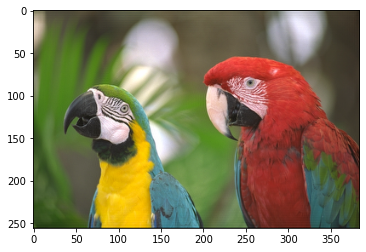

In [117]:
plt.imshow(coloredDownscaling(img_parrot, 0.5, 0.5))

### (c)
Nos resultados obtidos aqui ocorre perda de informação conforme a imagem original vai sendo dimiuida. Na redução por sub-amostragem, aparecem artefatos em função da periodicidade da imagem original (os pixels relocados formam padrões com outros pixels relocados).

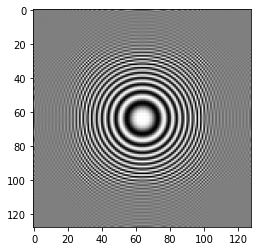

In [118]:
plt.imshow(downscaling(img_chirp, 0.5, 0.5), cmap="gray")

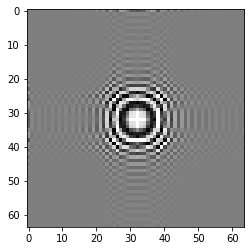

In [119]:
plt.imshow(downscaling(img_chirp, 0.25, 0.25), cmap="gray")